<a href="https://colab.research.google.com/github/1WA23CS034/Machine-Learning/blob/main/ML_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


1. Perform the describe and info steps

In [2]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


2. Plot the histogram of each feature( Indicate what does histogram
indicate on median_income and house_median_age)

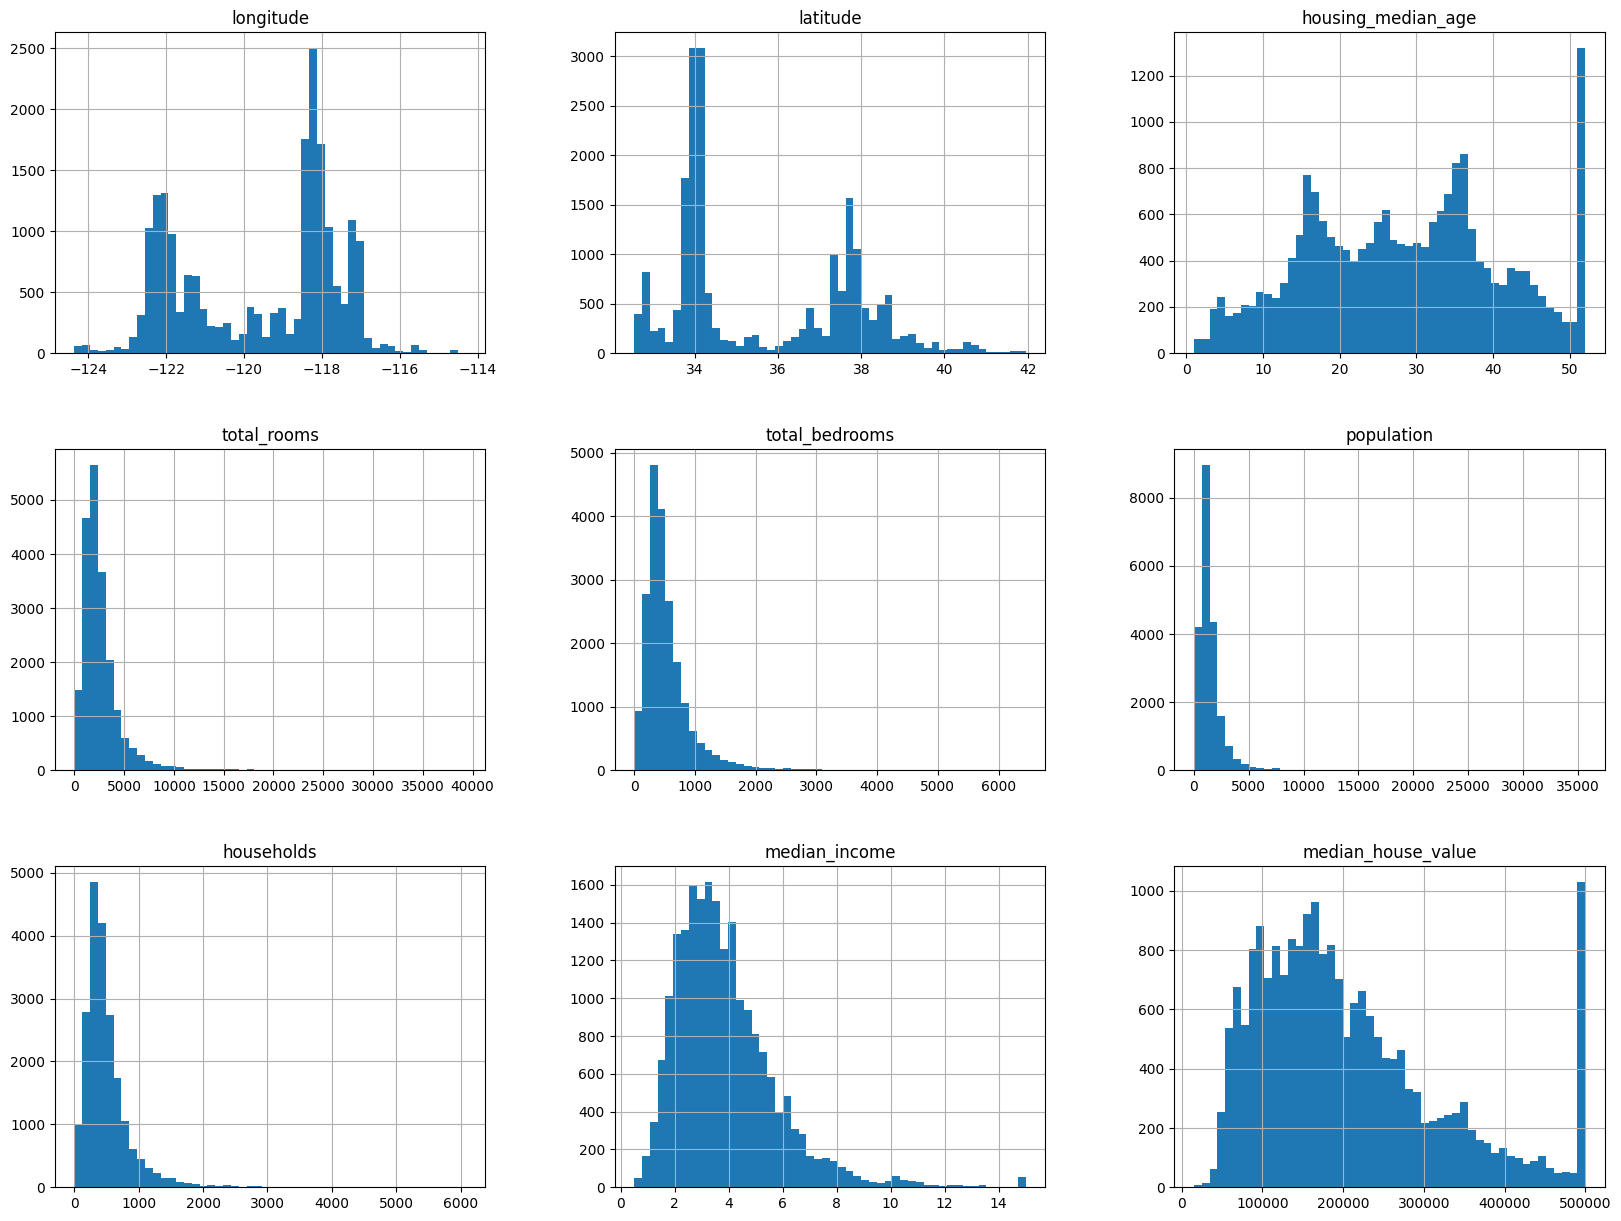

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


Median Income:
Most values are concentrated between 1 and ~6. Very few extremely high values. It indicates that income is right-skewed (long tail at high incomes).

Housing Median Age:
Many houses fall into middle age ranges, fewer very old or very new. It shows housing age is spread out but slightly left-skewed (more in younger to mid age)

3. Demonstrate the process of creating a test set( write the difference
between random and stratified test set)

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Training set size:", train_set.shape)
print("Test set size:", test_set.shape)


Training set size: (16512, 11)
Test set size: (4128, 11)


In [11]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5]
)

print("\nIncome Category Distribution:")
print(df["income_cat"].value_counts())

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

print("\nStratified Training set size:", strat_train.shape)
print("Stratified Test set size:", strat_test.shape)

# Remove income_cat
for set_ in (strat_train, strat_test):
    set_.drop("income_cat", axis=1, inplace=True)



Income Category Distribution:
income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Stratified Training set size: (16512, 11)
Stratified Test set size: (4128, 11)


4. List the geographical features from the dataset and plot a graph to
Visualize Geographical Data(what does the graph indicate w.r.t
housing prices and location)

<Figure size 1000x700 with 0 Axes>

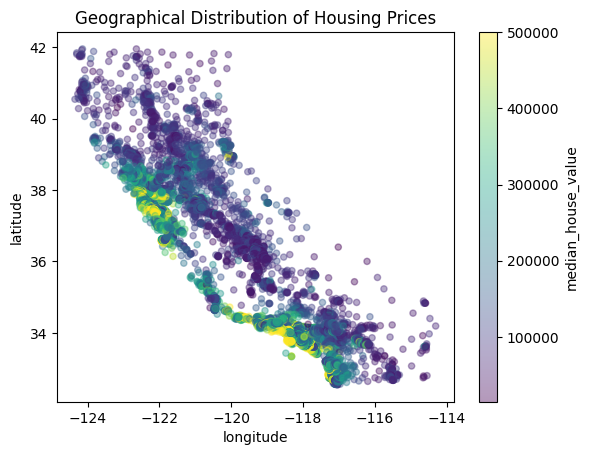

In [12]:
plt.figure(figsize=(10,7))
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    c="median_house_value",
    cmap="viridis",
    colorbar=True
)
plt.title("Geographical Distribution of Housing Prices")
plt.show()


Expensive houses cluster near coastal regions. Location strongly impacts price.

5. Plot a graph to show features correlation with housing price.
Which feature corelates to the maximum. Plot the graph for that
with housing price and analyze what the graph indicates

In [13]:
corr_matrix = df.corr(numeric_only=True)

print("\nCorrelation with median_house_value:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))



Correlation with median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [14]:
most_corr_feature = corr_matrix["median_house_value"].sort_values(ascending=False).index[1]
print("\nMost correlated feature (excluding itself):", most_corr_feature)



Most correlated feature (excluding itself): median_income


<Figure size 800x600 with 0 Axes>

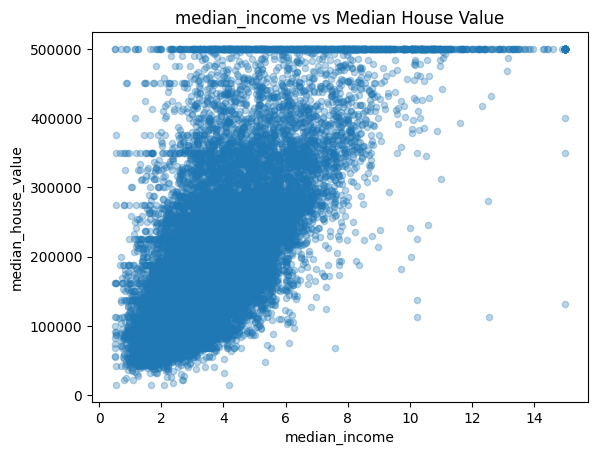

In [15]:
plt.figure(figsize=(8,6))
df.plot(kind="scatter", x=most_corr_feature, y="median_house_value", alpha=0.3)
plt.title(f"{most_corr_feature} vs Median House Value")
plt.show()


median_income shows strongest positive correlation indicating that higher income areas have higher house prices

6. List the features that could be combined to improve correlation and
plot again to see if correlation has improved

In [26]:
df1=pd.read_csv('housing.csv')

In [22]:
corr_before = df1.corr(numeric_only=True)

print("Correlation BEFORE feature engineering:")
print(corr_before["median_house_value"].sort_values(ascending=False))


Correlation BEFORE feature engineering:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [23]:
df1["rooms_per_household"] = df1["total_rooms"] / df1["households"]
df1["bedrooms_per_room"] = df1["total_bedrooms"] / df1["total_rooms"]
df1["population_per_household"] = df1["population"] / df1["households"]


In [24]:
corr_after = df1.corr(numeric_only=True)

print("\nCorrelation AFTER feature engineering:")
print(corr_after["median_house_value"].sort_values(ascending=False))



Correlation AFTER feature engineering:
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [25]:
comparison = pd.DataFrame({
    "Before": corr_before["median_house_value"],
    "After": corr_after["median_house_value"]
})

print(comparison.sort_values("After", ascending=False))


                            Before     After
median_house_value        1.000000  1.000000
median_income             0.688075  0.688075
rooms_per_household            NaN  0.151948
total_rooms               0.134153  0.134153
housing_median_age        0.105623  0.105623
households                0.065843  0.065843
total_bedrooms            0.049686  0.049686
population_per_household       NaN -0.023737
population               -0.024650 -0.024650
longitude                -0.045967 -0.045967
latitude                 -0.144160 -0.144160
bedrooms_per_room              NaN -0.255880


After feature engineering, the newly created feature bedrooms_per_room showed a stronger absolute correlation (-0.255) with median house value compared to the original feature total_bedrooms (0.049). Similarly, rooms_per_household showed slightly higher correlation than total_rooms. Therefore, feature engineering improved the relationship strength with housing prices

7. List the features that needs to be cleaned and demonstrate the
process of cleaning

In [36]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df_num = df.drop("ocean_proximity", axis=1)

df_num_imputed = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns
)

print("\nAfter Imputation - Missing Values:")
print(df_num_imputed.isnull().sum())



After Imputation - Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [34]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


8. Is there any categorical data that needs to be converted to
numerical? If so explain the method used to convert and code the
same and show the output.

In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

df_cat = df[["ocean_proximity"]]

df_cat_encoded = encoder.fit_transform(df_cat)

encoded_df = pd.DataFrame(
    df_cat_encoded,
    columns=encoder.get_feature_names_out(["ocean_proximity"])
)

print("\nEncoded Categorical Data:")
print(encoded_df)



Encoded Categorical Data:
       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3               

9. Discuss the importance of feature scaling

Prevents domination of large-value features.
Required for Gradient Descent, SVM, KNN.
Improves model convergence speed.

10. Design a pipeline inculcating (Custom transform, feature
scaling and encoding). Explain how it works

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

df2=pd.read_csv('housing.csv')
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        return np.c_[X, rooms_per_household, population_per_household]

num_attribs = list(df2.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

df_prepared = full_pipeline.fit_transform(df2)

print("\nFinal Processed Data Shape:")
print(df_prepared.shape)



Final Processed Data Shape:
(20640, 16)


working of pipeline inculcating:

1)Missing values handled (Imputer)

2)Custom features added

3)Features scaled

4)Categorical data encoded

5)Everything combined automatically